# Analysis Google Play Store Apps

### Content
+ Introduction: Analysis Google Play Store Apps
+ Data description
+ Research questions
+ Data preparation

## 1. Introduction: Google Play Store Apps

  Google Play formerly Android Market, is a digital distribution service operated and developed by Google. It serves as the official app store for certified devices running on the Android operating system, allowing users to browse and download applications developed with the Android software development kit and published through Google. Google Play also serves as a digital media store, offering music, books, movies, and television programs. Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

  Google Play was created on March 6, 2012, bringing together Android Market, Google Music, and the Google eBookstore under one brand, marking a shift in Google's digital distribution strategy. The services included in Google Play are Google Play Books, Google Play Games, Google Play Movies & TV and Google Play Music. Following their re-branding, Google has gradually expanded the geographical support for each of the services. The Google Play store had over 82 billion app downloads in 2016 and has reached over 3.5 million apps published in 2017.
  
  This dataset has more than 10.000 details about Google Play Store Apps. I took ready dataset from kaggle.com

Source(https://en.wikipedia.org/wiki/Google_Play)

## 2. Data description

Google Play was created on March 6, 2012, bringing together Android Market, Google Music, and the Google eBookstore under one brand, marking a shift in Google's digital distribution strategy. The services included in Google Play are Google Play Books, Google Play Games, Google Play Movies & TV and Google Play Music. Following their re-branding, Google has gradually expanded the geographical support for each of the services. The Google Play store had over 82 billion app downloads in 2016 and has reached over 3.5 million apps published in 2017.

Our analysis will be based on data of year 2018, because it has the most recent and available data on Analysis Google Play Store App. Below is data that we will be scraped and used for our analysis:

+ App - application name
+ Category - Category the app
+ Rating - Overall user rating of the app (as when scraped)
+ Reviews - Number of user reviews for the app (as when scraped)
+ Size - Size of the app (as when scraped)
+ Installs - Number of user downloads/installs for the app (as when scraped)
+ Type - Paid or Free
+ Price - Price of the app (as when scraped)
+ Content Rating - Age group the app is targeted at - Children / Mature 21+ / Adult
+ Genres - An app can belong to multiple genres (apart from its main category).
+ Last updated - Date when the app was last updated on Play Store



## 3. Research questions

For this project, data analysis and visualization contains 5 parts:

1. Analyze Rating display in the list of apps
2. Analyze Content rating and Genres display in the list of apps
3. Analyze Install display in the list of apps
4. Analyze Last Update display in the list of apps 
5. Analyze Review display in the list of apps

## 4. Data preparation

In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
# to open file
hp_file = open(file='googleplaystore.csv', 
               mode='r',
               encoding="ISO-8859-1")

In [3]:
hp_file.read()

'App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver\nPhoto Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up\nColoring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up\n"U Launcher Lite â\x80\x93 FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up\nSketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up\nPixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up\nPaper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up\nSmoke Effect 

In [4]:
hp_file = open(file='googleplaystore.csv', mode='r')

In [5]:
# to show all columns
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
# to show firstline
firstline = hp_file.readline()
print(firstline)

App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver



In [7]:
# to show seventh line
seventhline = hp_file.readline()
print(seventhline)

Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up



In [8]:
# to delete unnecessary columns 
df.drop([ 'Current Ver' , 'Android Ver'], axis='columns', inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018"
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017"
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015"


In [9]:
# to delete null values
df7=df.dropna()
df7

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017"
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018"
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015"


In [10]:
# to delete duplicate columns
df7.drop_duplicates()
df7

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017"
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018"
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015"


In [11]:
df.shape

(10841, 11)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
dtypes: float64(1), object(10)
memory usage: 931.8+ KB


In [13]:
df["Genres"]

0                     Art & Design
1        Art & Design;Pretend Play
2                     Art & Design
3                     Art & Design
4          Art & Design;Creativity
                   ...            
10836                    Education
10837                    Education
10838                      Medical
10839            Books & Reference
10840                    Lifestyle
Name: Genres, Length: 10841, dtype: object

In [14]:
df["Genres"].value_counts()

Tools                                  842
Entertainment                          623
Education                              549
Medical                                463
Business                               460
                                      ... 
February 11, 2018                        1
Health & Fitness;Action & Adventure      1
Puzzle;Education                         1
Role Playing;Education                   1
Lifestyle;Pretend Play                   1
Name: Genres, Length: 120, dtype: int64

## 5. Visualization

### 1. Analyze Rating display in the list of apps

So, here we will analyze rating of the apps

In [15]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


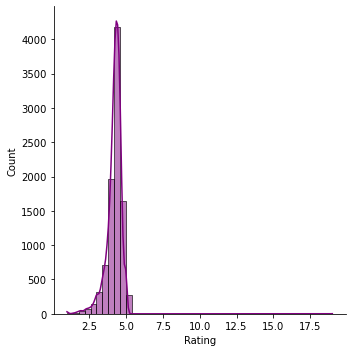

In [53]:
sns.displot(data=df,
            x="Rating", binwidth = .4, color = 'purple', kde="True");

Here we can see the rating of the apps. Almost 70% is rated 4.0 to 5.0

### 2. Analyze Content rating and Genres display in the list of apps


We will analyze the content rating with genres

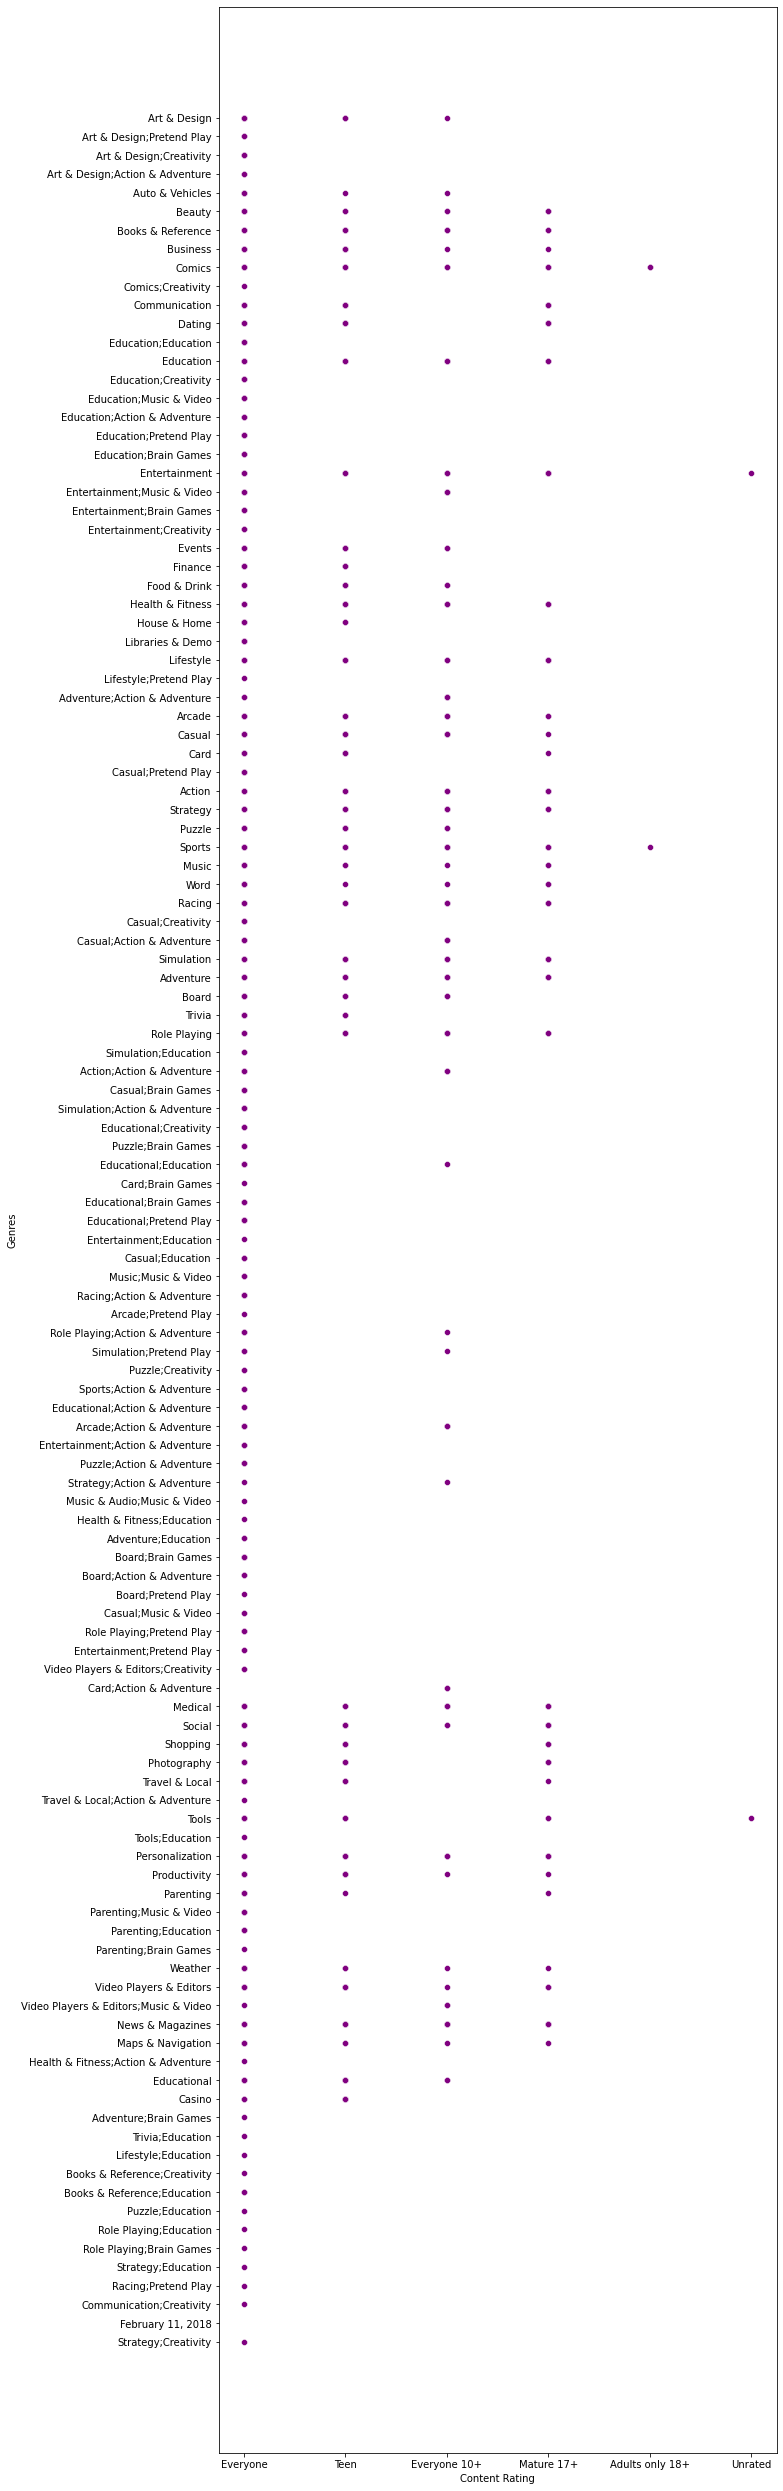

In [55]:
ax = plt.subplots(figsize=(10, 45))
sns.scatterplot(data=df, 
            y="Genres",
            x="Content Rating",
            color="purple");

On this histogram, we can see the content rating by app genre. We can say that all types of genres are intended for use by people of all ages. The lowest number of ratings is Adults only 18+.

### 3. Analyze Install display in the list of apps


We will analyze Installing lists of apps with

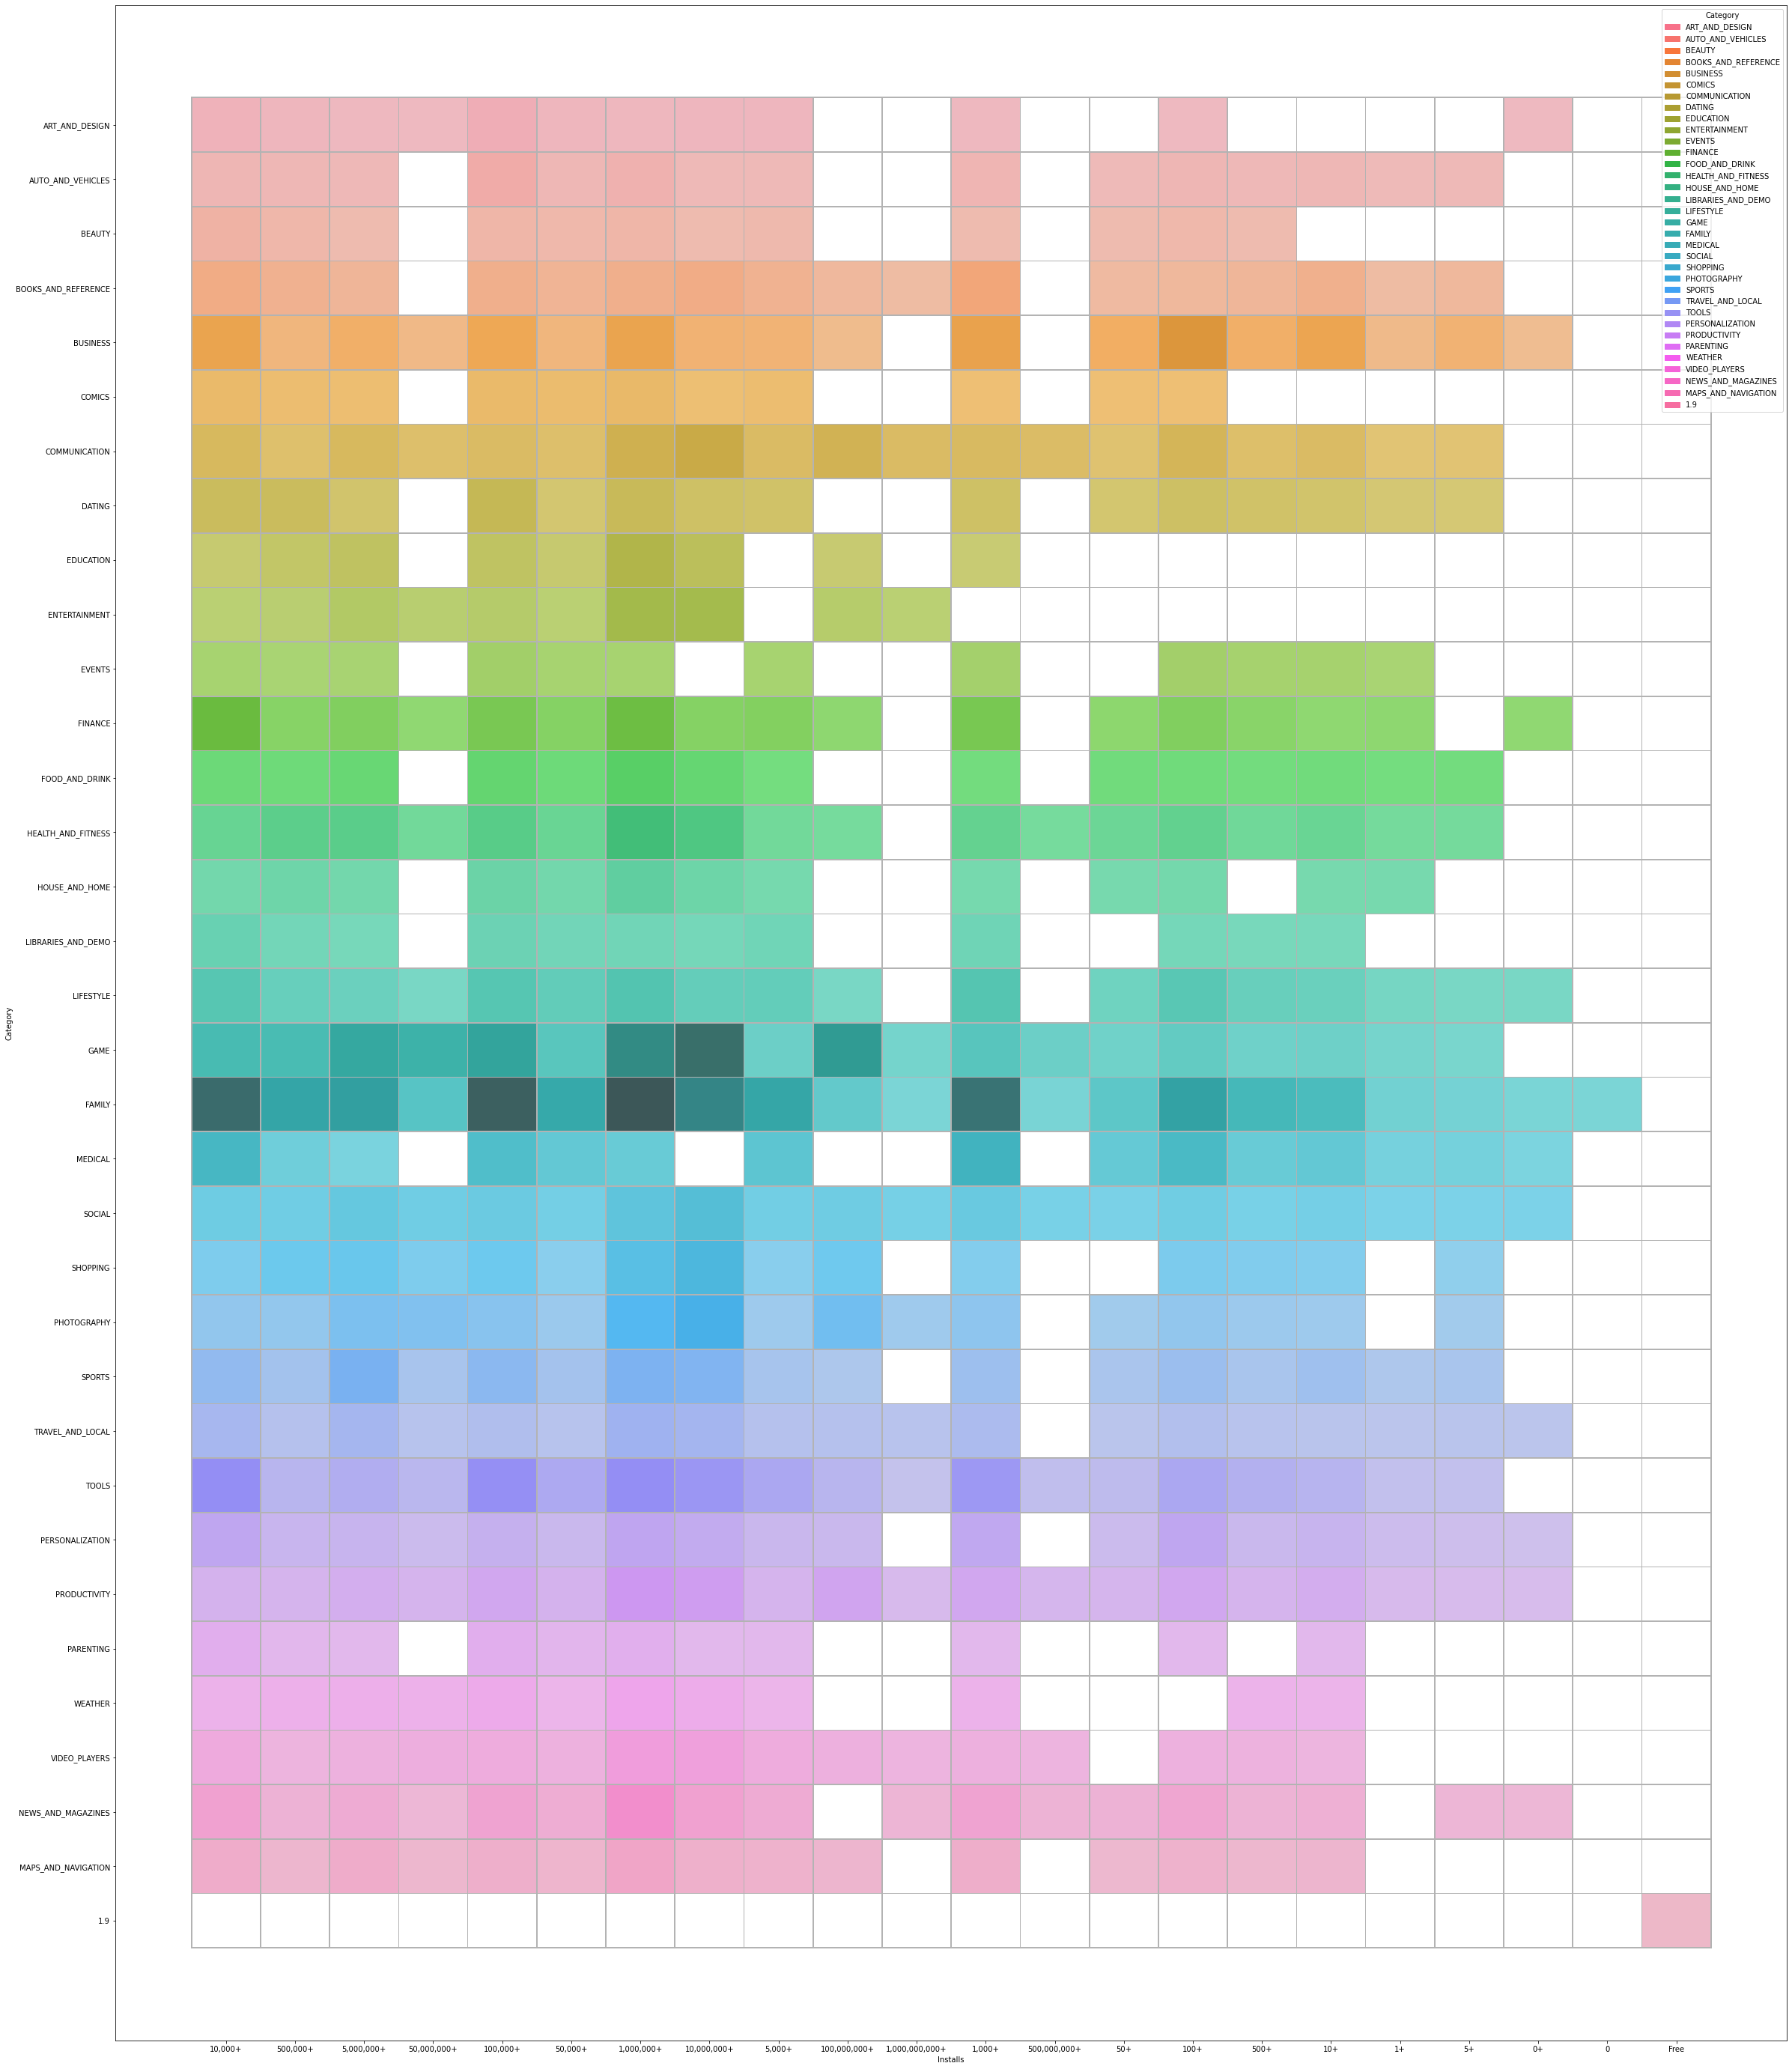

In [58]:

ax = plt.subplots(figsize=(40, 50))
sns.histplot(data=df,
             y="Category",
             x="Installs",
             hue="Category",
             multiple="stack",
             edgecolor=".7",
             linewidth=.7       
            );

In this histogram, we can see that installed apps are grouped by category. And you can see different colors, these are the colors of each category, and the fact that some are light and some are dark can be explained in this way: those places where the least downloaded app in this category is light colors, and those that downloaded in this number are most displayed in dark tones.

### 4. Analyze Last Update display in the list of apps 

Here we analyze the last update apps with category

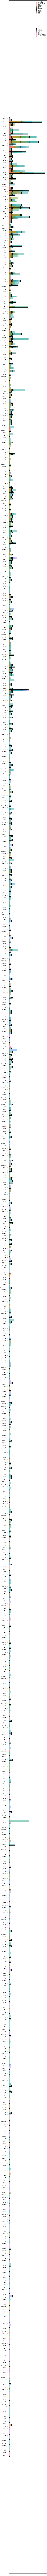

In [56]:
f, ax = plt.subplots(figsize=(10,700))
ax=sns.histplot(data=df, 
            y="Last Updated", 
            hue="Category"
           );

In this histogram, we see the last Updated app by category. Here we can see the number of updated apps by category, and which categories were updated on which days. On August 2, 2018, the app was updated the most.